In [82]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib_venn import venn3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [53]:
networks={}
for name in ['PCD','CHR','DNA']:
    cName = 'Consensus '+name
    networks[cName]=nx.read_edgelist('1 output\\'+cName)
    networks[cName].name=cName
    
[print(G) for G in networks.values()]

Graph named 'Consensus PCD' with 170 nodes and 1840 edges
Graph named 'Consensus CHR' with 162 nodes and 1297 edges
Graph named 'Consensus DNA' with 233 nodes and 4616 edges


[None, None, None]

## REPORT

In [54]:
###--DRIVERS
intoGen=pd.read_csv('3 input/intogen.tsv',sep='\t')
ncg_canonical=set(pd.read_csv('3 input/ncg_canonical.txt',header=None)[0])
ncg_candidate=set(pd.read_csv('3 input/ncg_candidate.txt',header=None)[0])
print(len(set(intoGen['SYMBOL'])),len(ncg_canonical))
driverUnion=ncg_canonical.union(set(intoGen['SYMBOL']))
print(len(driverUnion))

568 591
787


In [55]:
reports={}
for sp in ['CHR','DNA','PCD']:
    report={}
    name='Consensus '+sp
    G=networks[name]
    for gene in sorted(G.nodes):
        with open('2 output/'+name+'-'+gene+'.pkl',mode='rb') as f:
            barcode=pickle.load(f)
            dim0=len([bar for bar in barcode if bar[0]==0])
            dim1=len([bar for bar in barcode if bar[0]==1])
            dim2=len([bar for bar in barcode if bar[0]==2])

        report[gene]=[dim0,dim1,dim2]
    reports[sp]=pd.DataFrame(report).T
    

### Gene and Drivers Intersections

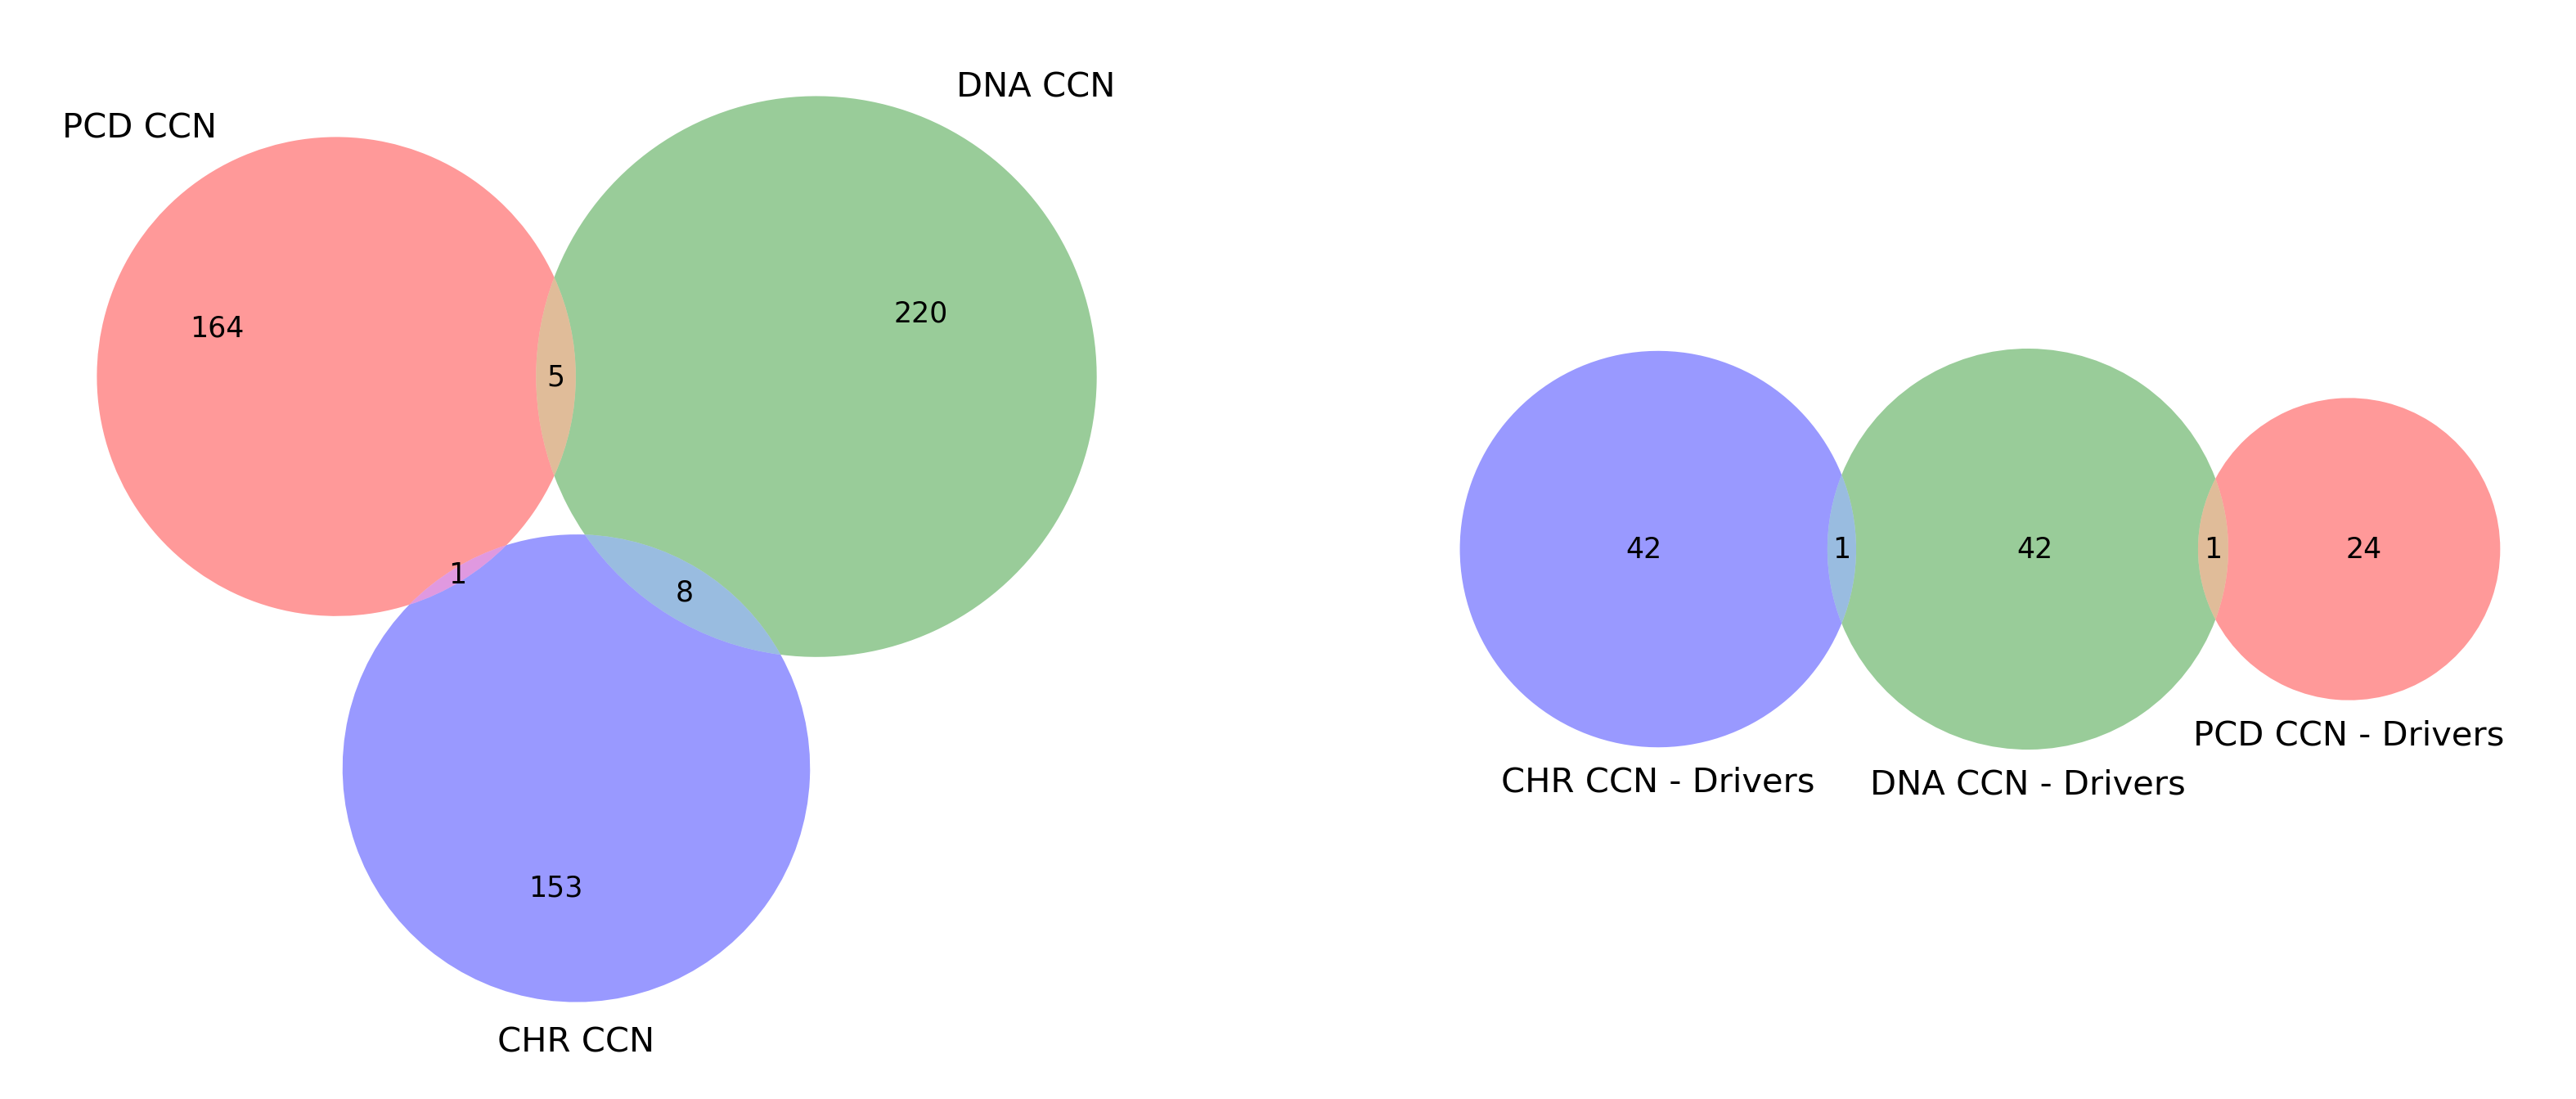

In [90]:
plt.figure(figsize=(16, 8),dpi=250)

plt.subplot(1,2,1)
set1 = set(networks["Consensus PCD"].nodes())
set2 = set(networks["Consensus DNA"].nodes())
set3 = set(networks["Consensus CHR"].nodes())
venn3([set1, set2, set3], ('PCD CCN', 'DNA CCN', 'CHR CCN'))

plt.subplot(1,2,2)
set1 = set(networks["Consensus PCD"].nodes())&driverUnion
set2 = set(networks["Consensus DNA"].nodes())&driverUnion
set3 = set(networks["Consensus CHR"].nodes())&driverUnion
venn3([set1, set2, set3], ('PCD CCN - Drivers', 'DNA CCN - Drivers', 'CHR CCN - Drivers'))
# Display the plot
plt.show()

In [93]:
set1&set2,set1&set3,set2&set3

({'TP53'}, set(), {'EP300'})

## Number of H2 in consensus networks: CHR 2, DNA 4, PCD 10
I will keep only genes that decrease the number of H2 in each dataset

##### H2 and H1 Distribution

In [56]:
uniqueImpactfulGenes=set()

### PCD

In [57]:
sp='PCD'
df = reports[sp][reports[sp][2]<10].sort_values(by=[2])

display(df)
geneList=list(df.index)
print('Impact Genes:',len(geneList))
drivers=set(geneList)&driverUnion
print('Drivers Genes:',len(drivers),sorted(drivers))
nonDrivers=set(geneList)-driverUnion
print('Non-Drivers Genes:',len(nonDrivers),sorted(nonDrivers))
print('All',sorted(geneList))
geneListPCD = geneList
geneListDict={
    "PCD Drivers":drivers,
    "PCD nonDrivers":nonDrivers,
}

,0,1,2
TP53,169,31,5
CASP3,166,34,7
CASP6,169,24,7
CASP8,168,23,7
PTK2,169,23,8
HSP90AA1,169,23,8
STUB1,169,23,9
STAT3,169,20,9
ROCK1,169,22,9
RIPK1,169,23,9


Impact Genes: 18
Drivers Genes: 8 ['AKT1', 'CASP3', 'CASP8', 'CTNNB1', 'HSP90AA1', 'RIPK1', 'STAT3', 'TP53']
Non-Drivers Genes: 10 ['APAF1', 'BAD', 'BIRC2', 'CASP1', 'CASP6', 'MAPT', 'PTK2', 'ROCK1', 'STUB1', 'TNFSF10']
All ['AKT1', 'APAF1', 'BAD', 'BIRC2', 'CASP1', 'CASP3', 'CASP6', 'CASP8', 'CTNNB1', 'HSP90AA1', 'MAPT', 'PTK2', 'RIPK1', 'ROCK1', 'STAT3', 'STUB1', 'TNFSF10', 'TP53']


In [58]:
for gene in nonDrivers:
    print(gene)
print('Out of these 10, only BAD does not appear in Cancer Mine')

BAD
CASP6
PTK2
ROCK1
CASP1
BIRC2
STUB1
TNFSF10
MAPT
APAF1
Out of these 10, only BAD does not appear in Cancer Mine


In [59]:
for g in geneList:
    if g in uniqueImpactfulGenes:
        print(g)
    uniqueImpactfulGenes.add(g)

### DNA

In [60]:
sp='DNA'
df = reports[sp][reports[sp][2]<4].sort_values(by=[2,1])
display(df)
geneList=list(df.index)
print('Impact Genes:',len(geneList))
drivers=set(geneList)&driverUnion
print('Drivers Genes:',len(drivers),sorted(drivers))
nonDrivers=set(geneList)-driverUnion
print('Non-Drivers Genes:',len(nonDrivers),sorted(nonDrivers))
print('All',sorted(geneList))
geneListDNA = geneList
geneListDict["DNA Drivers"]=drivers
geneListDict["DNA nonDrivers"]=nonDrivers

,0,1,2
ATR,232,15,2
EP300,232,16,2
ABL1,232,14,3
XPA,232,14,3
ACTL6A,232,15,3
ATM,232,15,3
FANCD2,232,15,3
HERC2,232,15,3
POLN,232,15,3
RAD51,232,15,3


Impact Genes: 13
Drivers Genes: 7 ['ABL1', 'ATM', 'ATR', 'EP300', 'FANCD2', 'HERC2', 'XPA']
Non-Drivers Genes: 6 ['ACTL6A', 'KAT5', 'PCNA', 'POLN', 'RAD51', 'XRCC6']
All ['ABL1', 'ACTL6A', 'ATM', 'ATR', 'EP300', 'FANCD2', 'HERC2', 'KAT5', 'PCNA', 'POLN', 'RAD51', 'XPA', 'XRCC6']


In [61]:
for gene in nonDrivers:
    print(gene)
print('Desses 6, só o POLN não aparece no Cancer Mine')

KAT5
PCNA
RAD51
POLN
XRCC6
ACTL6A
Desses 6, só o POLN não aparece no Cancer Mine


In [62]:
for g in geneList:
    if g in uniqueImpactfulGenes:
        print(g)
    uniqueImpactfulGenes.add(g)

### CHR

In [63]:
sp='CHR'
df = reports[sp][reports[sp][2]<2].sort_values(by=[2,1])
display(df)
geneList=list(df.index)
print('Impact Genes:',len(geneList))
drivers=set(geneList)&driverUnion
print('Drivers Genes:',len(drivers),sorted(drivers))
nonDrivers=set(geneList)-driverUnion
print('Non-Drivers Genes:',len(nonDrivers),sorted(nonDrivers))
print('All',sorted(geneList))
geneListCHR = geneList
geneListDict["CHR Drivers"]=drivers
geneListDict["CHR nonDrivers"]=nonDrivers

,0,1,2
RELA,160,13,1
ACTL6A,161,15,1
BRMS1,161,15,1
SMARCE1,161,15,1
WDR77,161,15,1


Impact Genes: 5
Drivers Genes: 2 ['RELA', 'SMARCE1']
Non-Drivers Genes: 3 ['ACTL6A', 'BRMS1', 'WDR77']
All ['ACTL6A', 'BRMS1', 'RELA', 'SMARCE1', 'WDR77']


In [64]:
for gene in nonDrivers:
    print(gene)
print('Desses 3, só o WDR77 não aparece no Cancer Mine')

BRMS1
WDR77
ACTL6A
Desses 3, só o WDR77 não aparece no Cancer Mine


In [65]:
for g in geneList:
    if g in uniqueImpactfulGenes:
        print(g)
    uniqueImpactfulGenes.add(g)

ACTL6A


#### Impactful Genes

In [66]:
sorted(uniqueImpactfulGenes)

['ABL1',
 'ACTL6A',
 'AKT1',
 'APAF1',
 'ATM',
 'ATR',
 'BAD',
 'BIRC2',
 'BRMS1',
 'CASP1',
 'CASP3',
 'CASP6',
 'CASP8',
 'CTNNB1',
 'EP300',
 'FANCD2',
 'HERC2',
 'HSP90AA1',
 'KAT5',
 'MAPT',
 'PCNA',
 'POLN',
 'PTK2',
 'RAD51',
 'RELA',
 'RIPK1',
 'ROCK1',
 'SMARCE1',
 'STAT3',
 'STUB1',
 'TNFSF10',
 'TP53',
 'WDR77',
 'XPA',
 'XRCC6']

In [67]:
def plotBarcode(bc):
    data=[]
    for dim, timeLived in bc:
        if dim in [1,2]:
            data.append((dim,timeLived,timeLived[1]-timeLived[0],timeLived[0]))
    df=pd.DataFrame(data,columns=['Dim','BirthDeath','TimeLived','Birth'])
    df=df.sort_values(by=['BirthDeath','TimeLived'],ascending=False)
    colorsByDimension={0:'tab:red',1:'tab:blue',2:'tab:green',3:'tab:purple',4:'tab:orange'}
    i=0
    groups=list(df.groupby(by=['Dim']))
    for dim,df in groups:        
        for _,df2 in df.groupby(by=['Birth']):
            timeLived=list(df2['BirthDeath'])
            for birth,death in timeLived:                
                plt.broken_barh(xranges=[(birth, death-birth)], yrange=(len(data)-i, 0.75),color=colorsByDimension[dim])
                i+=1

    #add the continuos line 
    xMin,xMax=plt.xlim()
    plt.broken_barh(xranges=[(0,xMax)], yrange=(i+1, 0.75),color=colorsByDimension[0])
    plt.xlim(1,xMax)
    plt.ylim(0,38)
    #plt.ylim(0,205)

In [68]:
# plt.figure(figsize=(16,8),dpi=350)

# plt.subplot(1,3,1)
# plotBarcode(barcodePCD)        
# plt.title('Consensus PCD',fontsize=14)
# plt.tight_layout()

# plt.subplot(1,3,2)
# plotBarcode(barcodeBAD)        
# plt.title('Consensus PCD - BAD Removal',fontsize=14)
# plt.tight_layout()

# plt.subplot(1,3,3)
# plotBarcode(barcodeTP53)        
# plt.title('Consensus PCD - TP53 Removal',fontsize=14)
# plt.tight_layout()

# #plt.suptitle('Networks Barcodes\n',fontsize=20)
# plt.tight_layout()
# plt.savefig('4.1 output/barcodes table3 v3.png',facecolor='w')
# plt.show()

## Calculate the position for centrality measures between impact and not impact genes

In [69]:
geneListDict["PCD newDrivers"]={"BAD"}
geneListDict["DNA newDrivers"]={"POLN"}
geneListDict["CHR newDrivers"]={"WDR77"}

In [70]:
measuresDict={}

#### Degree

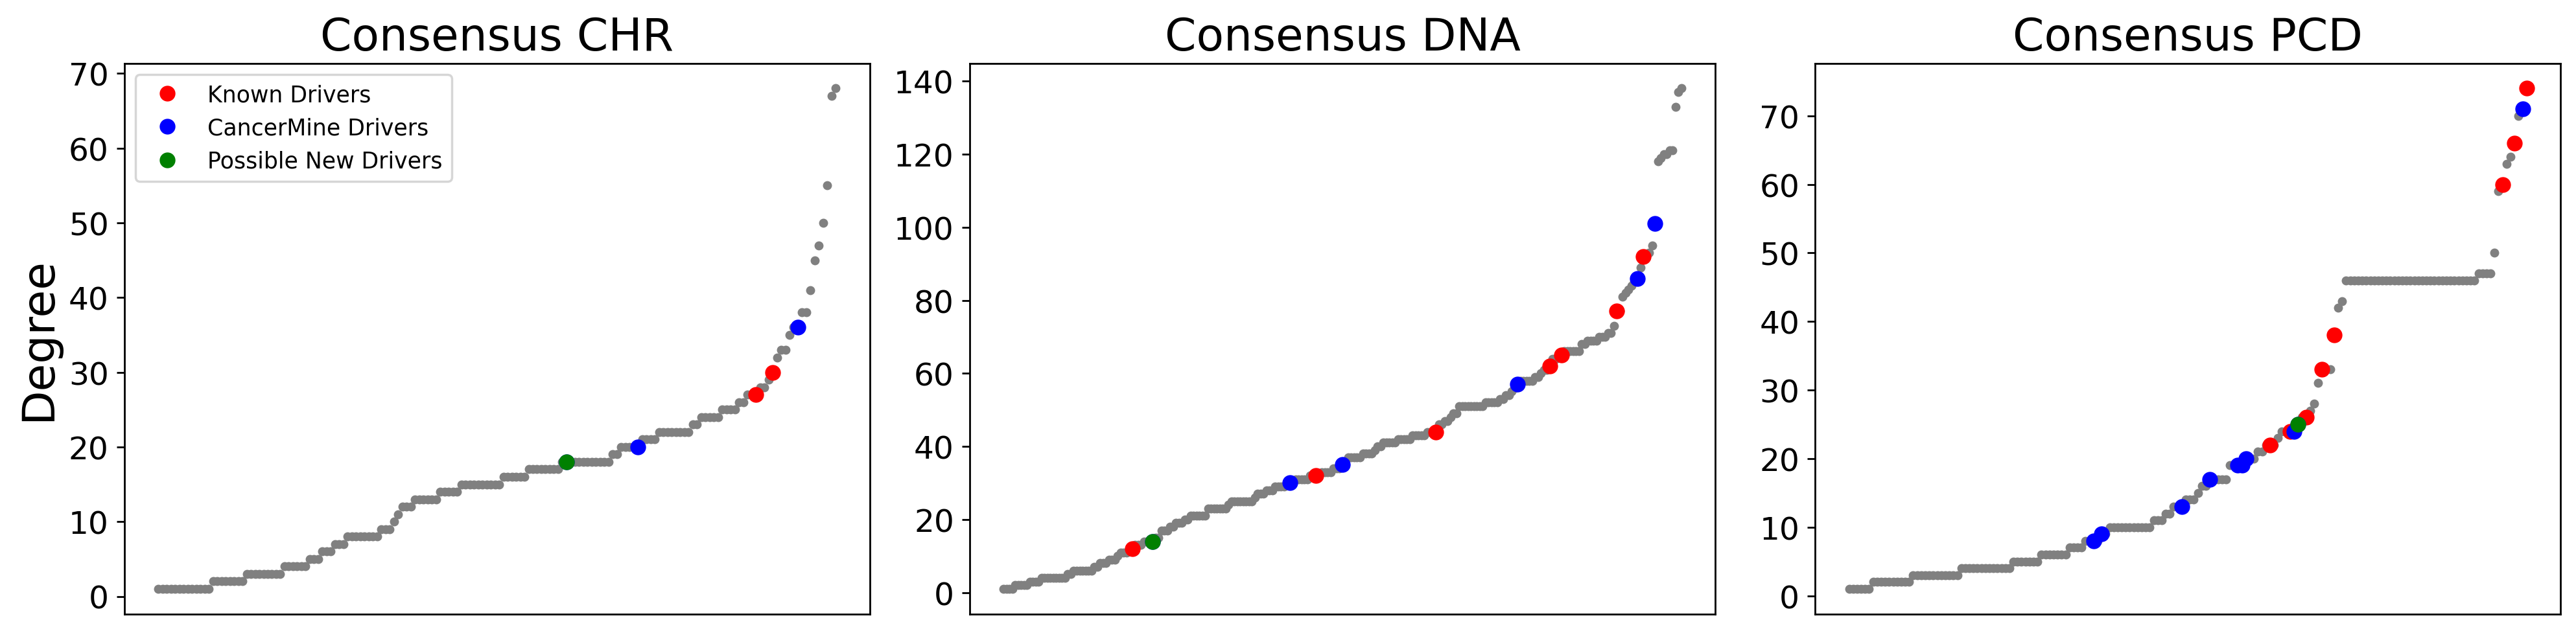

In [71]:
plt.figure(figsize=(16,4),dpi=250)
i=1
measuresDict["Degree"]={}
for sp in ['CHR','DNA','PCD']:
    plt.subplot(1,3,i)
    
    measureDict=dict(networks["Consensus "+sp].degree())
    measureDict=dict(sorted(measureDict.items(),key=lambda x:x[1],reverse=False))
    measuresDict["Degree"][sp]=measureDict
    plt.plot(measureDict.keys(),measureDict.values(),".",color="gray")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" Drivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="r",label="Known Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" nonDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="CancerMine Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" newDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="g",label="Possible New Drivers")
    
    plt.xticks([])
    plt.yticks(fontsize=14)
    if i==1:
        plt.ylabel("Degree",fontsize=20)
        plt.legend()
    plt.title("Consensus "+sp,fontsize=20)
    plt.tight_layout()
    i+=1
    
plt.tight_layout()
plt.savefig('3 output/centralityDistributionImpact_Degree.png',facecolor='w')
plt.show()
plt.close()

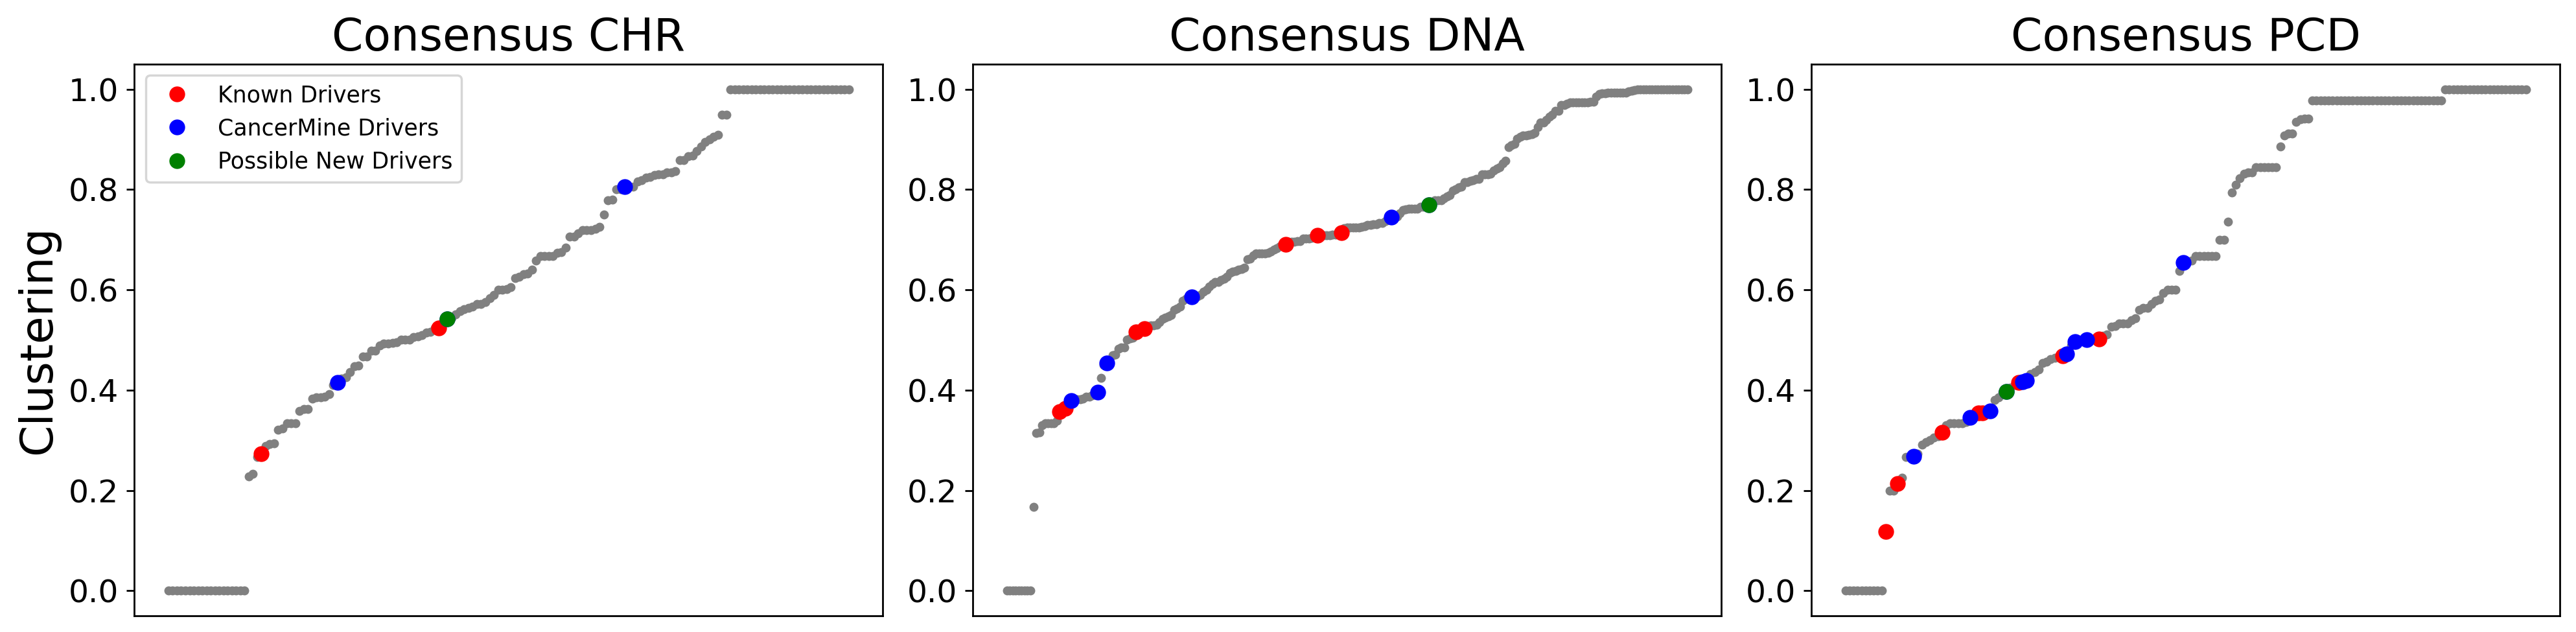

In [72]:
plt.figure(figsize=(16,4),dpi=250)
i=1
measuresDict["Clustering"]={}
for sp in ['CHR','DNA','PCD']:
    plt.subplot(1,3,i)
    
    measureDict=dict(nx.clustering(networks["Consensus "+sp]))
    measureDict=dict(sorted(measureDict.items(),key=lambda x:x[1],reverse=False))
    measuresDict["Clustering"][sp]=measureDict
    plt.plot(measureDict.keys(),measureDict.values(),".",color="gray")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" Drivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="r",label="Known Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" nonDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="CancerMine Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" newDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="g",label="Possible New Drivers")
    
    plt.xticks([])
    plt.yticks(fontsize=14)
    if i==1:
        plt.ylabel("Clustering",fontsize=20)
        plt.legend()
    plt.title("Consensus "+sp,fontsize=20)
    plt.tight_layout()
    i+=1
    
plt.tight_layout()
plt.savefig('3 output/centralityDistributionImpact_Clustering.png',facecolor='w')
plt.show()
plt.close()

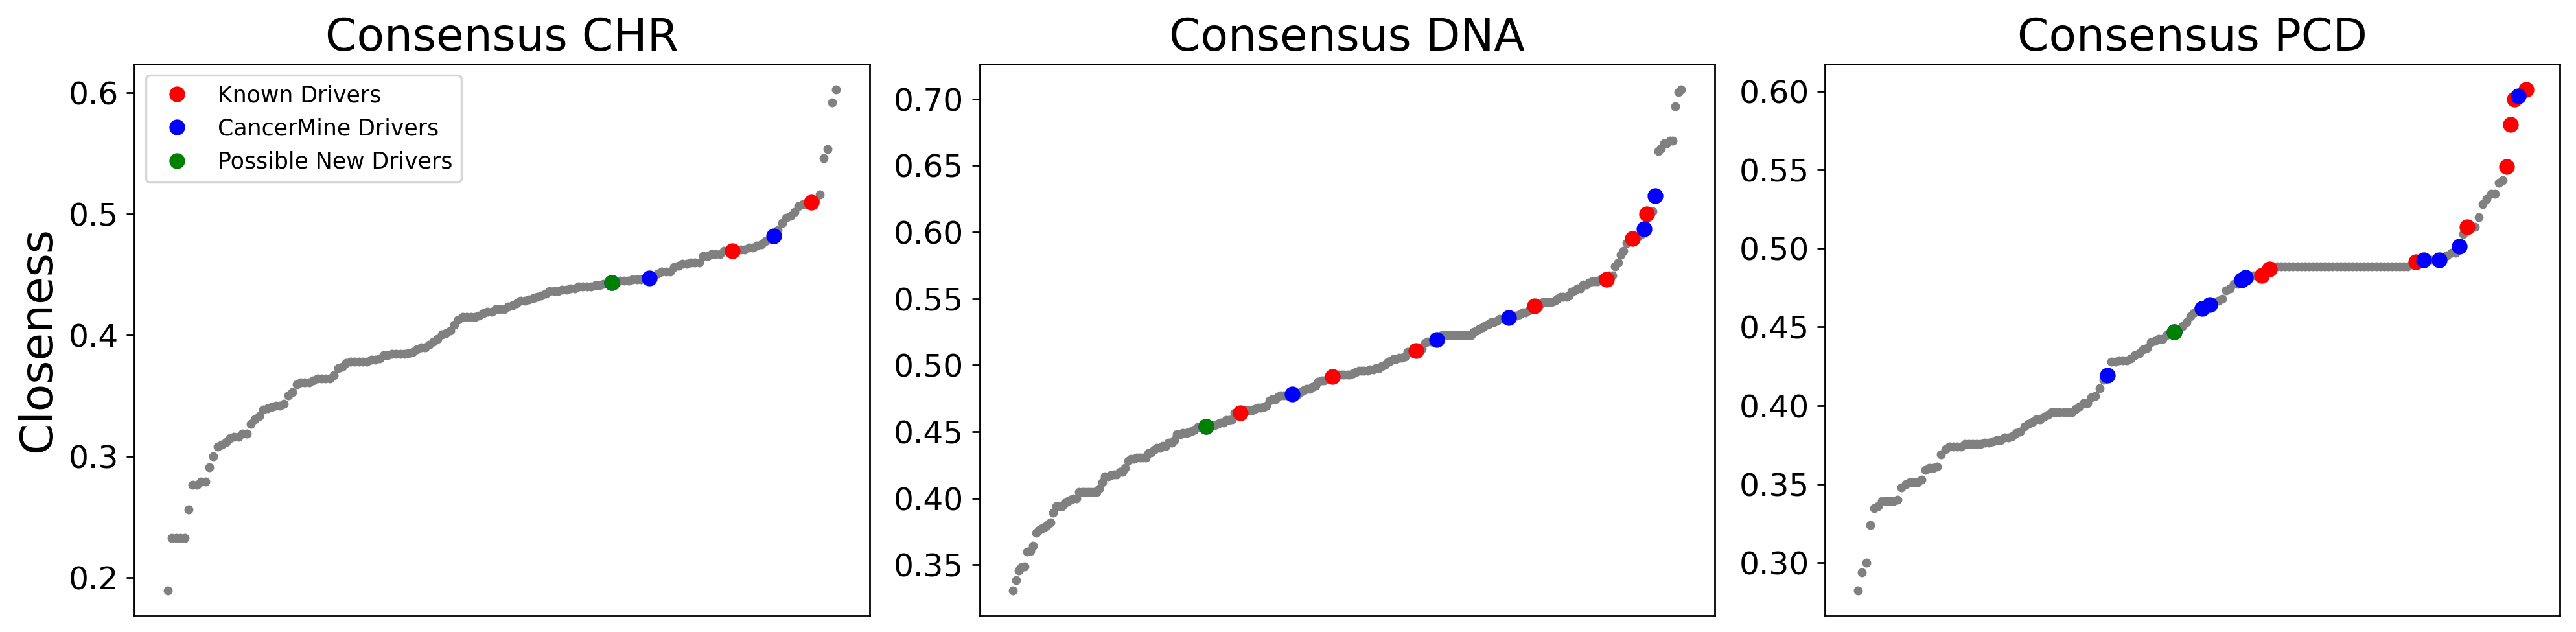

In [73]:
plt.figure(figsize=(16,4),dpi=250)
i=1
measuresDict["Closeness"]={}
for sp in ['CHR','DNA','PCD']:
    plt.subplot(1,3,i)
    
    measureDict=dict(nx.closeness_centrality(networks["Consensus "+sp]))
    measureDict=dict(sorted(measureDict.items(),key=lambda x:x[1],reverse=False))
    measuresDict["Closeness"][sp]=measureDict
    plt.plot(measureDict.keys(),measureDict.values(),".",color="gray")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" Drivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="r",label="Known Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" nonDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="CancerMine Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" newDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="g",label="Possible New Drivers")
    
    plt.xticks([])
    plt.yticks(fontsize=14)
    if i==1:
        plt.ylabel("Closeness",fontsize=20)
        plt.legend()
    plt.title("Consensus "+sp,fontsize=20)
    plt.tight_layout()
    i+=1
    
plt.tight_layout()
plt.savefig('3 output/centralityDistributionImpact_Closeness.png',facecolor='w')
plt.show()
plt.close()

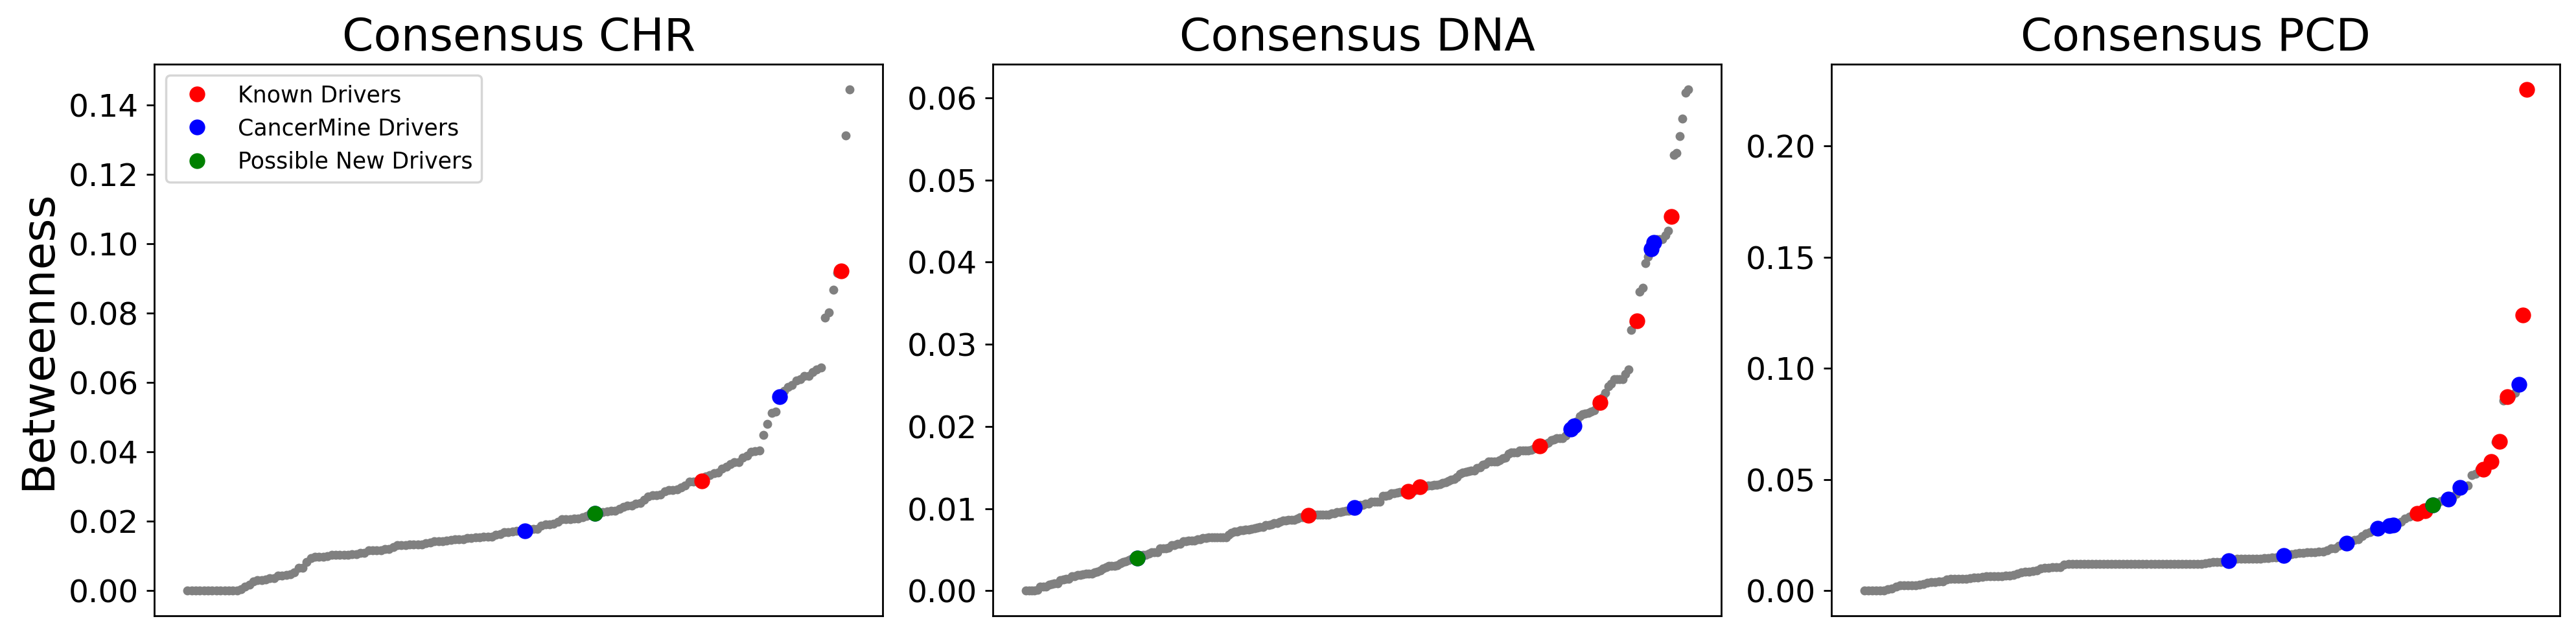

In [74]:
plt.figure(figsize=(16,4),dpi=250)
i=1
measuresDict["Betweenness"]={}
for sp in ['CHR','DNA','PCD']:
    plt.subplot(1,3,i)
    
    measureDict=dict(nx.current_flow_betweenness_centrality(networks["Consensus "+sp]))
    measureDict=dict(sorted(measureDict.items(),key=lambda x:x[1],reverse=False))
    measuresDict["Betweenness"][sp]=measureDict
    plt.plot(measureDict.keys(),measureDict.values(),".",color="gray")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" Drivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="r",label="Known Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" nonDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="CancerMine Drivers")
    
    filterDict = {k: measureDict[k] for k in geneListDict[sp+" newDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="g",label="Possible New Drivers")
    
    plt.xticks([])
    plt.yticks(fontsize=14)
    if i==1:
        plt.ylabel("Betweenness",fontsize=20)
        plt.legend()
    plt.title("Consensus "+sp,fontsize=20)
    plt.tight_layout()
    i+=1
    
plt.tight_layout()
plt.savefig('3 output/centralityDistributionImpact_Betweenness.png',facecolor='w')
plt.show()
plt.close()

In [75]:
geneListDict

{'PCD Drivers': {'AKT1',
  'CASP3',
  'CASP8',
  'CTNNB1',
  'HSP90AA1',
  'RIPK1',
  'STAT3',
  'TP53'},
 'PCD nonDrivers': {'APAF1',
  'BAD',
  'BIRC2',
  'CASP1',
  'CASP6',
  'MAPT',
  'PTK2',
  'ROCK1',
  'STUB1',
  'TNFSF10'},
 'DNA Drivers': {'ABL1', 'ATM', 'ATR', 'EP300', 'FANCD2', 'HERC2', 'XPA'},
 'DNA nonDrivers': {'ACTL6A', 'KAT5', 'PCNA', 'POLN', 'RAD51', 'XRCC6'},
 'CHR Drivers': {'RELA', 'SMARCE1'},
 'CHR nonDrivers': {'ACTL6A', 'BRMS1', 'WDR77'},
 'PCD newDrivers': {'BAD'},
 'DNA newDrivers': {'POLN'},
 'CHR newDrivers': {'WDR77'}}

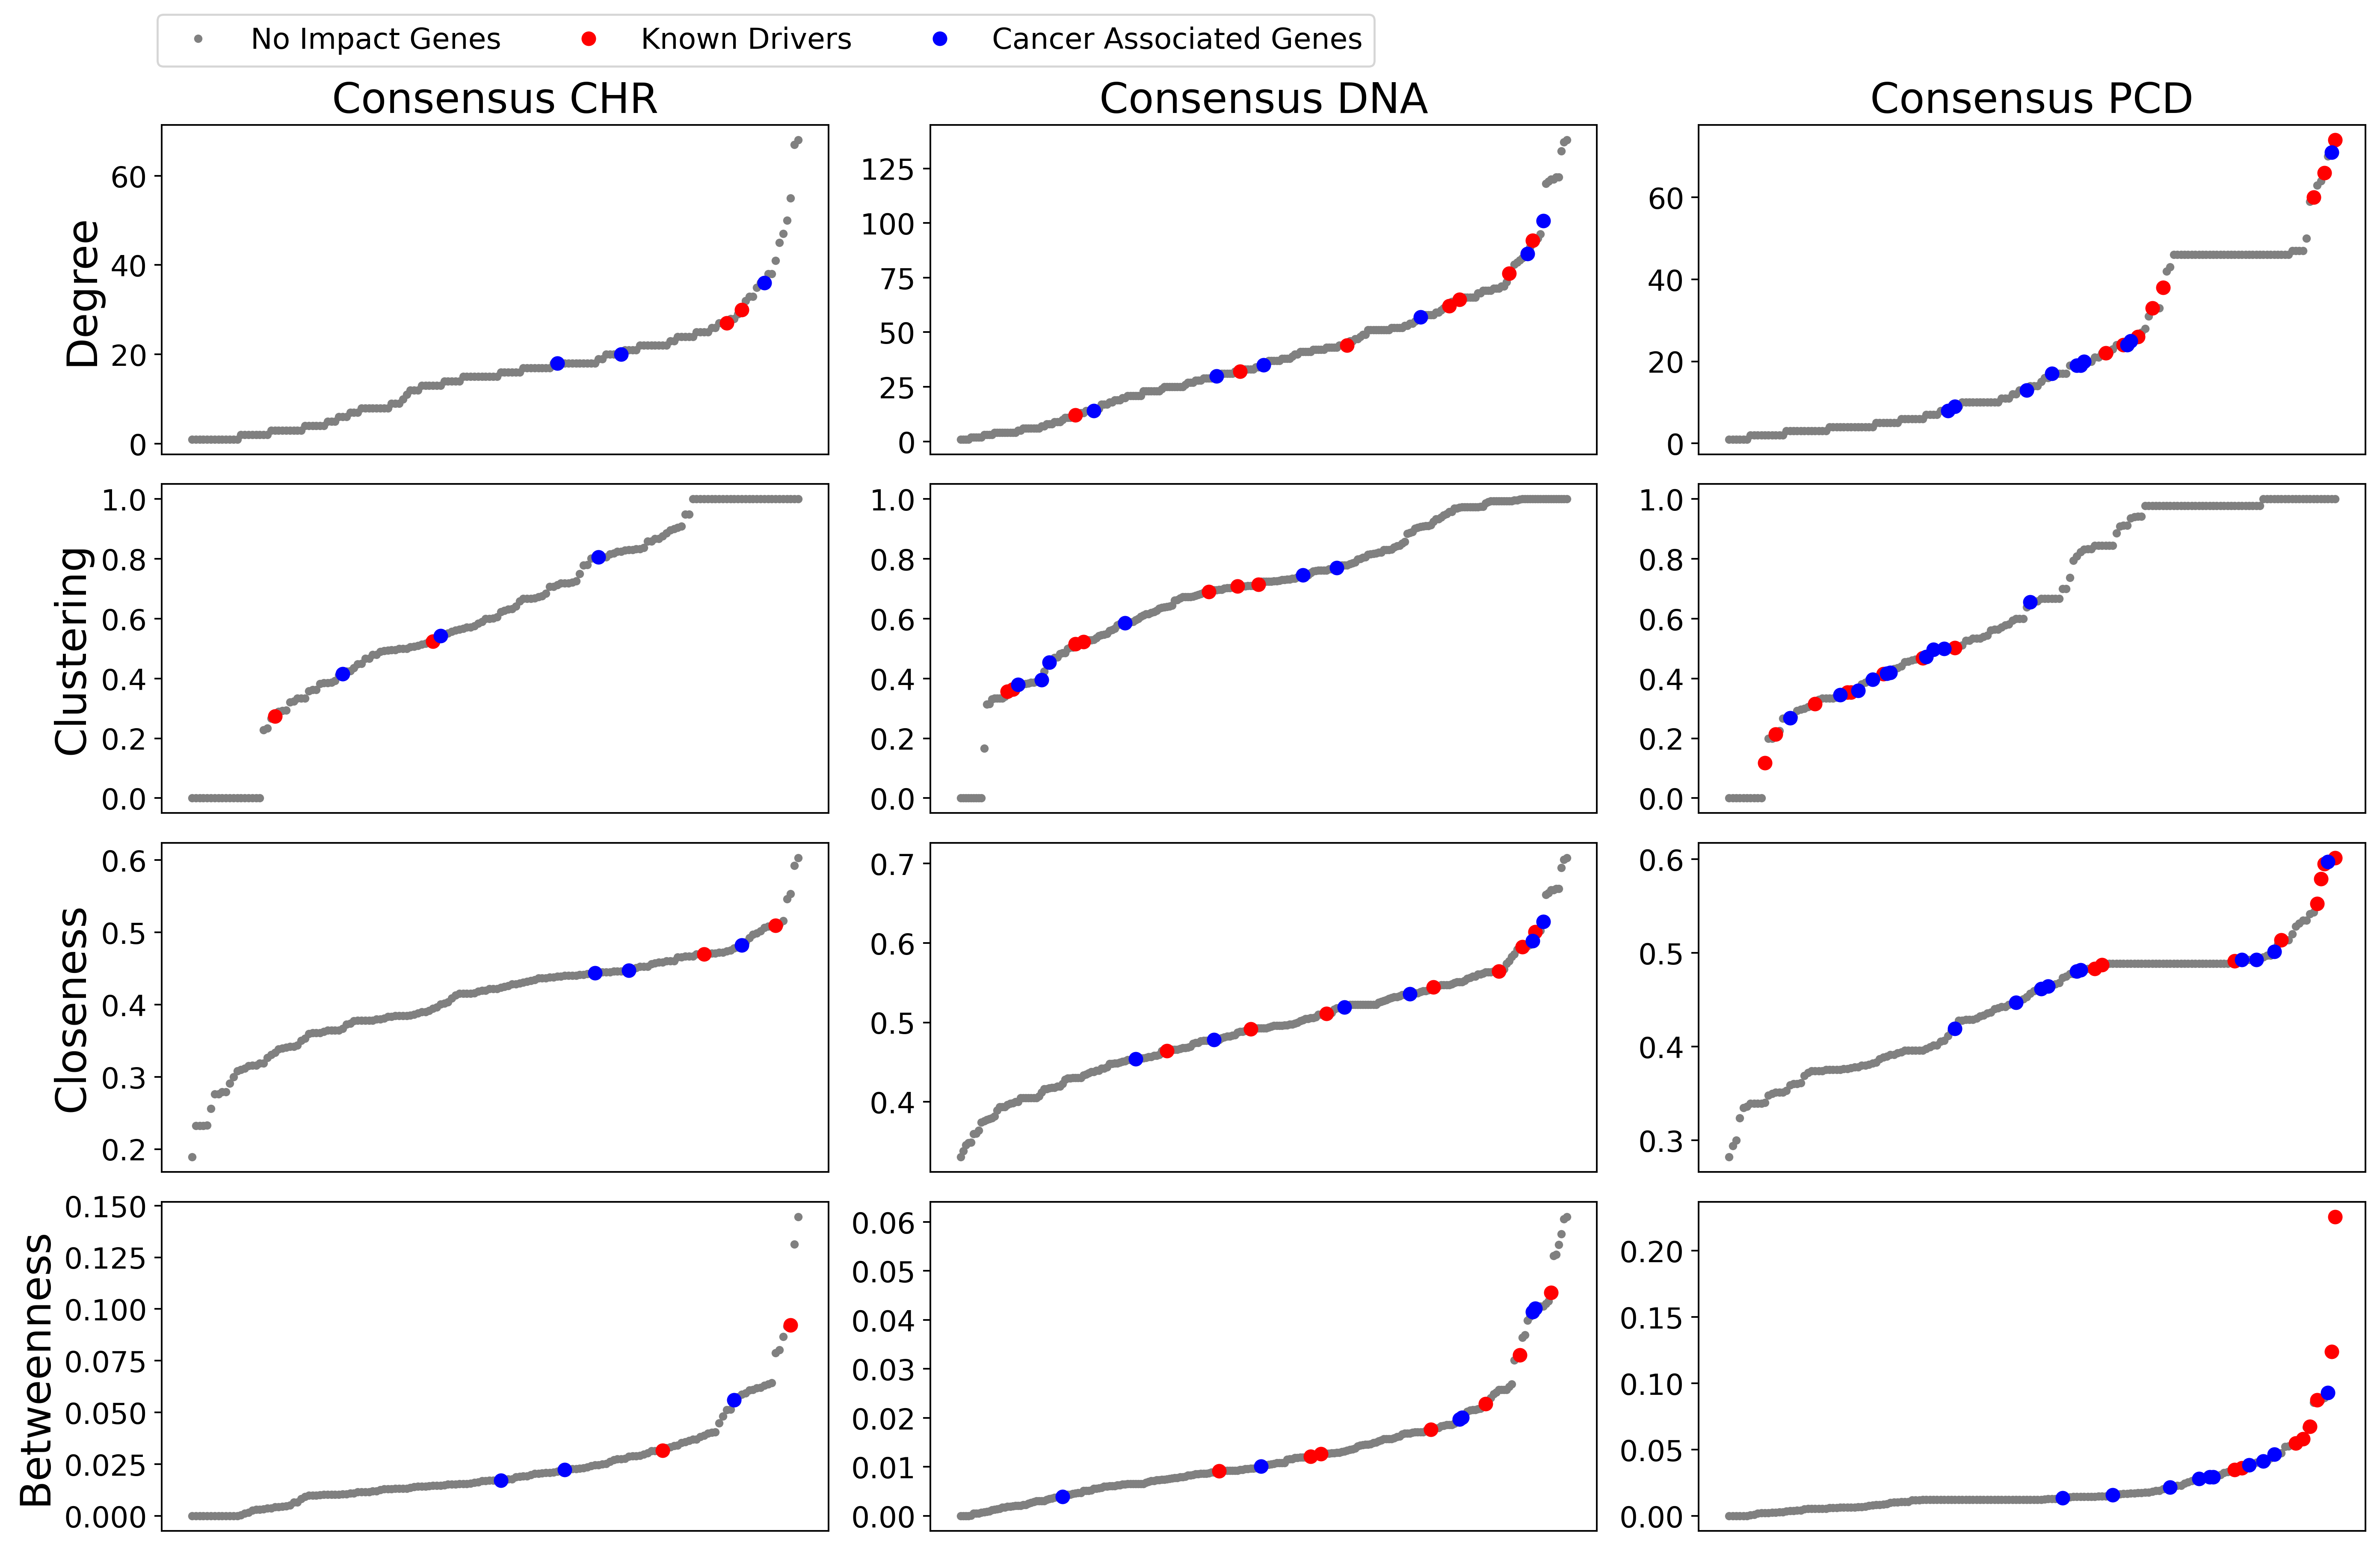

In [76]:
plt.figure(figsize=(16,10),dpi=350)
i=1
for m in measuresDict:
    for sp in ['CHR','DNA','PCD']:
        plt.subplot(4,3,i)
        
        measureDict=measuresDict[m][sp]
        plt.plot(measureDict.keys(),measureDict.values(),".",color="gray",label="No Impact Genes")
        
        filterDict = {k: measureDict[k] for k in geneListDict[sp+" Drivers"]}
        plt.plot(filterDict.keys(),filterDict.values(),"o",color="r",label="Known Drivers")
        
        filterDict = {k: measureDict[k] for k in geneListDict[sp+" newDrivers"].union( geneListDict[sp+" nonDrivers"])}
        plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="Cancer Associated Genes")
        
        # filterDict = {k: measureDict[k] for k in geneListDict[sp+" newDrivers"]}
        # plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="Cancer Associated Genes")
        
        plt.xticks([])
        plt.yticks(fontsize=14)
        if (i-1)%3==0:
            plt.ylabel(m,fontsize=20)
        if i in [1,2,3]:
            plt.title("Consensus "+sp,fontsize=20)
        # if i == 1:
        #     plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.95), ncol=4)

        plt.tight_layout()
        i+=1
plt.legend(loc='upper center', bbox_to_anchor=(-1.399, 4.65), ncol=4,fontsize=14)
plt.tight_layout()
plt.savefig('3 output/centralityDistributionImpact_ALL.png',facecolor='w')
plt.show()
plt.close()